In [95]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [96]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

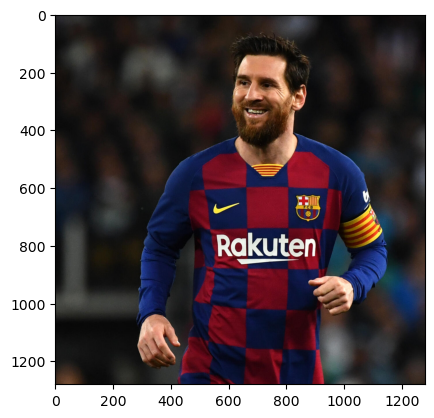

In [97]:
filename = "messi2.jpg"
img = read_file(filename)

org_img = np.copy(img)

In [98]:
# Create Edge Mask

def edge_mask(img, line_size, blur_value):
    # Convert the input image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Apply median blur to the grayscale image
    gray_blur = cv2.medianBlur(gray, blur_value)

    # Apply adaptive thresholding to the blurred grayscale image
    # This helps in highlighting edges in the image
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)

    # Return the resulting edge mask
    return edges

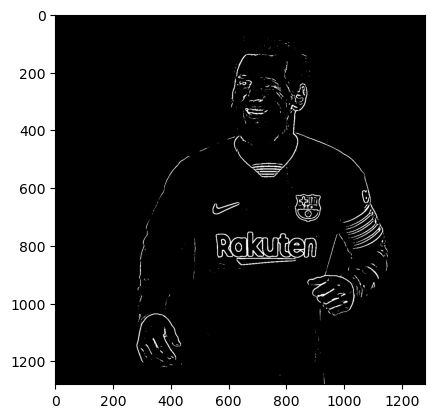

In [99]:
line_size, blur_value = 7, 7  # Set line_size and blur_value
edges = edge_mask(img, line_size, blur_value)  # Apply edge_mask function to the image

# Display the resulting edge mask using matplotlib

plt.imshow(edges, cmap="binary")
plt.show()


In [100]:
# Reducing the Color Palette



def color_quantization(img, k):
    # Transforming the image
    data = np.float32(img).reshape((-1, 3))

    # Determining Criteria for K-Means
    criteria = (cv2.TermCriteria_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

    # Implementing K-Means clustering
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # Converting the center values to integers
    center = np.uint8(center)

    # Creating the result image based on the labels and center values
    result = center[label.flatten()]
    result = result.reshape(img.shape)

    # The 'result' variable now contains the color-quantized image
    return result


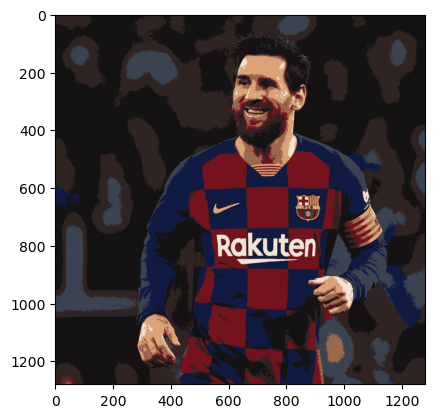

In [101]:
img2 = color_quantization(img, k=8)

plt.imshow(img2)
plt.show()


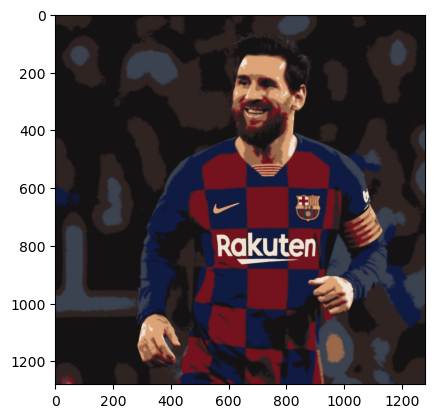

In [102]:
blurred_img = cv2.bilateralFilter(img2, d = 8, sigmaColor=200, sigmaSpace=200)

plt.imshow(blurred_img)
plt.show()


In [103]:
def cartoon():
    c = cv2.bitwise_and(blurred_img, blurred_img, mask=edges)

    plt.imshow(c)
    plt.title('Cartoonified Image')
    plt.show()

    plt.imshow(org_img)
    plt.title('Original Image')
    plt.show()

    

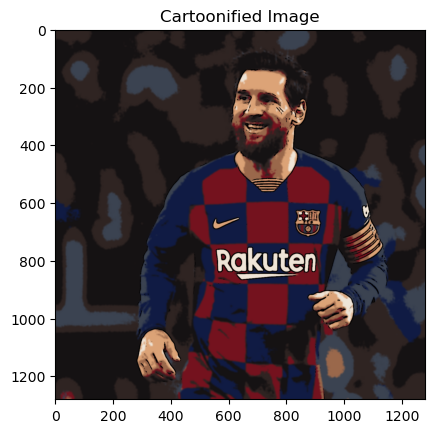

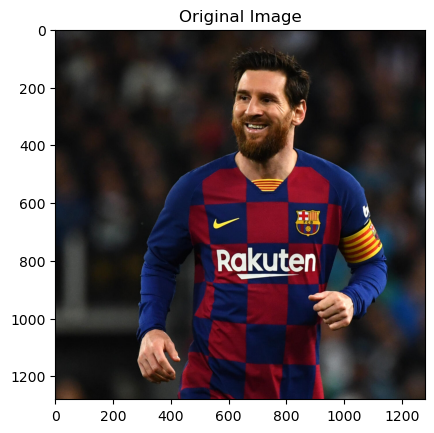

In [104]:
cartoon()